In [498]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor 
import warnings
warnings.filterwarnings('ignore')

In [499]:
data = pd.read_csv('https://raw.githubusercontent.com/dsrscientist/DSData/master/happiness_score_dataset.csv')
data

#loaded the csv file containing the data

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,Iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,Denmark,Western Europe,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,Norway,Western Europe,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,Canada,North America,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176
...,...,...,...,...,...,...,...,...,...,...,...,...
153,Rwanda,Sub-Saharan Africa,154,3.465,0.03464,0.22208,0.77370,0.42864,0.59201,0.55191,0.22628,0.67042
154,Benin,Sub-Saharan Africa,155,3.340,0.03656,0.28665,0.35386,0.31910,0.48450,0.08010,0.18260,1.63328
155,Syria,Middle East and Northern Africa,156,3.006,0.05015,0.66320,0.47489,0.72193,0.15684,0.18906,0.47179,0.32858
156,Burundi,Sub-Saharan Africa,157,2.905,0.08658,0.01530,0.41587,0.22396,0.11850,0.10062,0.19727,1.83302


# As I can see in the data, there are some columns which are not the part of anaylysis to be performed. 
#1. country - I don't need country column to predict the happiness score as it's just name of countries. same goes for Region column. 
#2. Happiness Rank - I also don't need happiness rank as it's ranking based on the highest to lowest happiness score. 
#3. Standard error - I will also exclued standard error for building the model.

In [500]:
data.drop(['Country', 'Region','Happiness Rank', 'Standard Error'], axis = 1, inplace=True)
data

,Happiness Score,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,7.587,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,7.561,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,7.527,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,7.522,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,7.427,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176
...,...,...,...,...,...,...,...,...
153,3.465,0.22208,0.77370,0.42864,0.59201,0.55191,0.22628,0.67042
154,3.340,0.28665,0.35386,0.31910,0.48450,0.08010,0.18260,1.63328
155,3.006,0.66320,0.47489,0.72193,0.15684,0.18906,0.47179,0.32858
156,2.905,0.01530,0.41587,0.22396,0.11850,0.10062,0.19727,1.83302


In [501]:
data.describe()

,Happiness Score,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
count,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000
mean,5.375734,0.846137,0.991046,0.630259,0.428615,0.143422,0.237296,2.098977
std,1.145010,0.403121,0.272369,0.247078,0.150693,0.120034,0.126685,0.553550
min,2.839000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.328580
25%,4.526000,0.545808,0.856823,0.439185,0.328330,0.061675,0.150553,1.759410
50%,5.232500,0.910245,1.029510,0.696705,0.435515,0.107220,0.216130,2.095415
75%,6.243750,1.158448,1.214405,0.811013,0.549092,0.180255,0.309883,2.462415
max,7.587000,1.690420,1.402230,1.025250,0.669730,0.551910,0.795880,3.602140


Observations : 
There are no missing values.
75th% and max in all colums are having very less gap and same goes with the gap between min and 25th%.
Mean and Median are nearby to each other in all columns.

In [502]:
data.shape #there are 158 rows and 8 colums in dataset

(158, 8)

In [503]:
data.dtypes #all columns are floats. No need of encoding

Happiness Score                  float64
Economy (GDP per Capita)         float64
Family                           float64
Health (Life Expectancy)         float64
Freedom                          float64
Trust (Government Corruption)    float64
Generosity                       float64
Dystopia Residual                float64
dtype: object

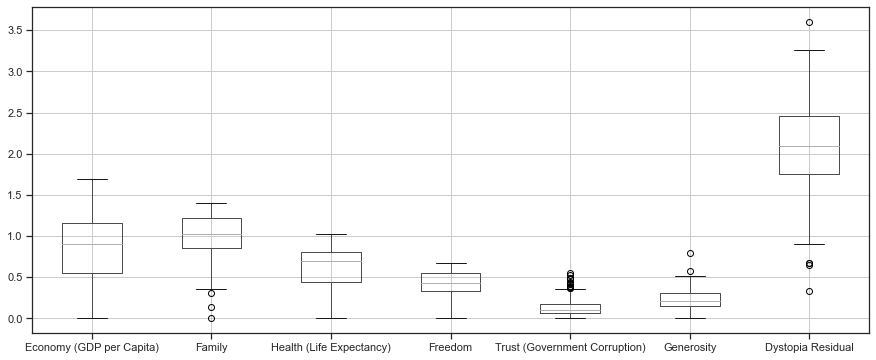

In [504]:
boxplot = data.boxplot(column=['Economy (GDP per Capita)', 'Family', 'Health (Life Expectancy)', 'Freedom', 'Trust (Government Corruption)','Generosity','Dystopia Residual'], figsize=[15,6])

Box plots are showing that there are outliers in the Family, Trust, Generosity and Dystopia residual columns, we need to check and remove them.

<AxesSubplot:xlabel='Economy (GDP per Capita)', ylabel='Density'>

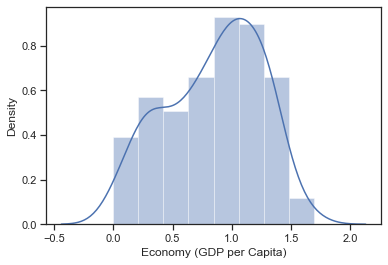

In [505]:
sns.distplot(data['Economy (GDP per Capita)'])

<AxesSubplot:xlabel='Family', ylabel='Density'>

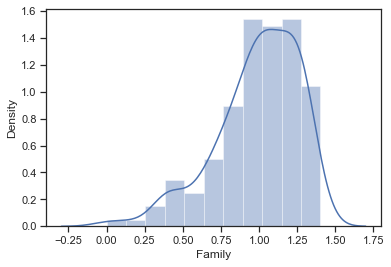

In [506]:
sns.distplot(data['Family'])

<AxesSubplot:xlabel='Health (Life Expectancy)', ylabel='Density'>

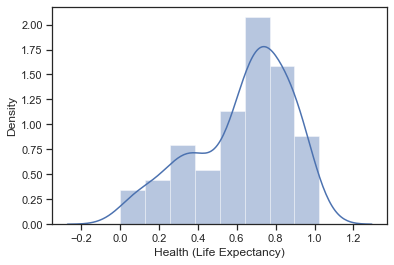

In [507]:
sns.distplot(data['Health (Life Expectancy)'])

<AxesSubplot:xlabel='Freedom', ylabel='Density'>

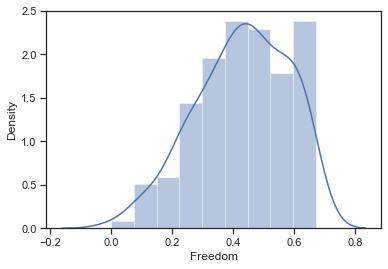

In [508]:
sns.distplot(data['Freedom'])

<AxesSubplot:xlabel='Trust (Government Corruption)', ylabel='Density'>

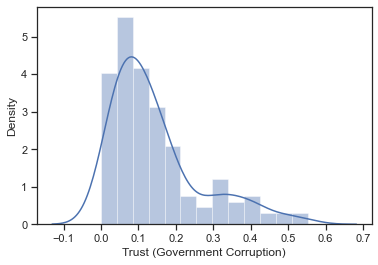

In [509]:
sns.distplot(data['Trust (Government Corruption)'])

<AxesSubplot:xlabel='Generosity', ylabel='Density'>

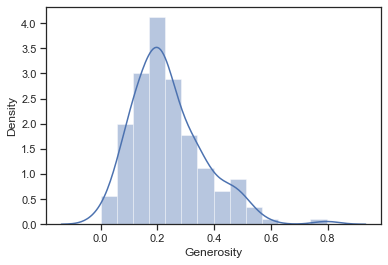

In [510]:
sns.distplot(data['Generosity'])

<AxesSubplot:xlabel='Dystopia Residual', ylabel='Density'>

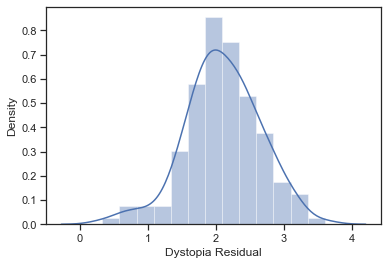

In [511]:
sns.distplot(data['Dystopia Residual'])

In [512]:
data.skew()

Happiness Score                  0.097769
Economy (GDP per Capita)        -0.317575
Family                          -1.006893
Health (Life Expectancy)        -0.705328
Freedom                         -0.413462
Trust (Government Corruption)    1.385463
Generosity                       1.001961
Dystopia Residual               -0.238911
dtype: float64

With above KDE plots and skew() funtion, I checked that there are columns having skewness. Hence First i will remove to check if removing outliers reduce the skewness or not.

In [513]:
from scipy.stats import zscore
z=np.abs(zscore(data))
z

array([[1.93736005, 1.36962124, 1.32028142, ..., 2.30965159, 0.47103971,
        0.75825809],
       [1.91458063, 1.13522625, 1.51445776, ..., 0.01647953, 1.57585637,
        1.09285682],
       [1.88479215, 1.19286069, 1.36105403, ..., 2.8427738 , 0.8242928 ,
        0.71233526],
       ...,
       [2.0761992 , 0.45524543, 1.90108634, ..., 0.38141902, 1.85689094,
        3.20843049],
       [2.1646885 , 2.06756644, 2.1184666 , ..., 0.35771452, 0.31694987,
        0.48198451],
       [2.22251319, 1.58633379, 3.13472485, ..., 0.30180313, 0.5581534 ,
        0.96361241]])

In [514]:
threshold=3
print(np.where(z>3))

(array([ 27, 128, 147, 153, 155, 157]), array([5, 6, 2, 5, 7, 2]))


I found that 5 rows are there as outlies which 0.03% of total data. Hence i will remove them from the data. 

In [515]:
data_new.shape

(152, 8)

New dataset consist of 152 rows and 8 columns.

In [516]:
data_new=data[(z<3).all(axis=1)]
data_new

,Happiness Score,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,7.587,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,7.561,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,7.527,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,7.522,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,7.427,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176
...,...,...,...,...,...,...,...,...
150,3.655,0.46534,0.77115,0.15185,0.46866,0.17922,0.20165,1.41723
151,3.587,0.25812,0.85188,0.27125,0.39493,0.12832,0.21747,1.46494
152,3.575,0.31982,0.30285,0.30335,0.23414,0.09719,0.36510,1.95210
154,3.340,0.28665,0.35386,0.31910,0.48450,0.08010,0.18260,1.63328


In [517]:
data_new.skew()

Happiness Score                  0.165587
Economy (GDP per Capita)        -0.401110
Family                          -0.815356
Health (Life Expectancy)        -0.733453
Freedom                         -0.406211
Trust (Government Corruption)    1.287270
Generosity                       0.646579
Dystopia Residual               -0.045578
dtype: float64

I have tried to reduce the skewness by removing the first layer of outliers and we can see the skewness has reduced a bit, not significantly. Also data consist of smaller gaps min-max values, hence i don't think that i need to apply standard scaler. I have reduced the skewness and outlier, hence i have not normalize the whole data.

In [518]:
data_new.describe()

,Happiness Score,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
count,152.000000,152.000000,152.000000,152.000000,152.000000,152.000000,152.000000,152.000000
mean,5.430658,0.858919,1.009270,0.636837,0.427884,0.138270,0.232025,2.127467
std,1.104249,0.390505,0.250683,0.244708,0.150316,0.113305,0.118924,0.523489
min,2.905000,0.000000,0.302850,0.000000,0.000000,0.000000,0.000000,0.654290
25%,4.600250,0.592603,0.881680,0.460545,0.326415,0.059685,0.144985,1.798990
50%,5.277000,0.919550,1.035210,0.697535,0.434635,0.105420,0.214105,2.112155
75%,6.275500,1.162160,1.220705,0.813547,0.547057,0.174760,0.301820,2.465407
max,7.587000,1.563910,1.402230,1.025250,0.669730,0.492100,0.576300,3.602140


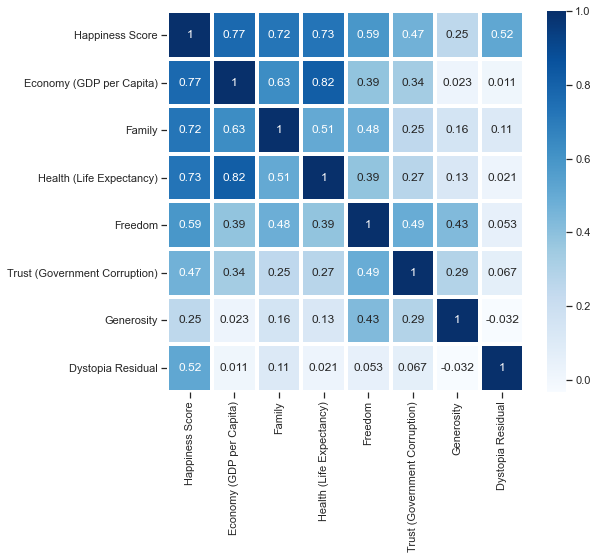

In [519]:
corr_hmap=data_new.corr()
plt.figure(figsize=(8,7))
sns.heatmap(corr_hmap,annot=True, linewidths=3, linecolor='w', cmap='Blues')
plt.show()

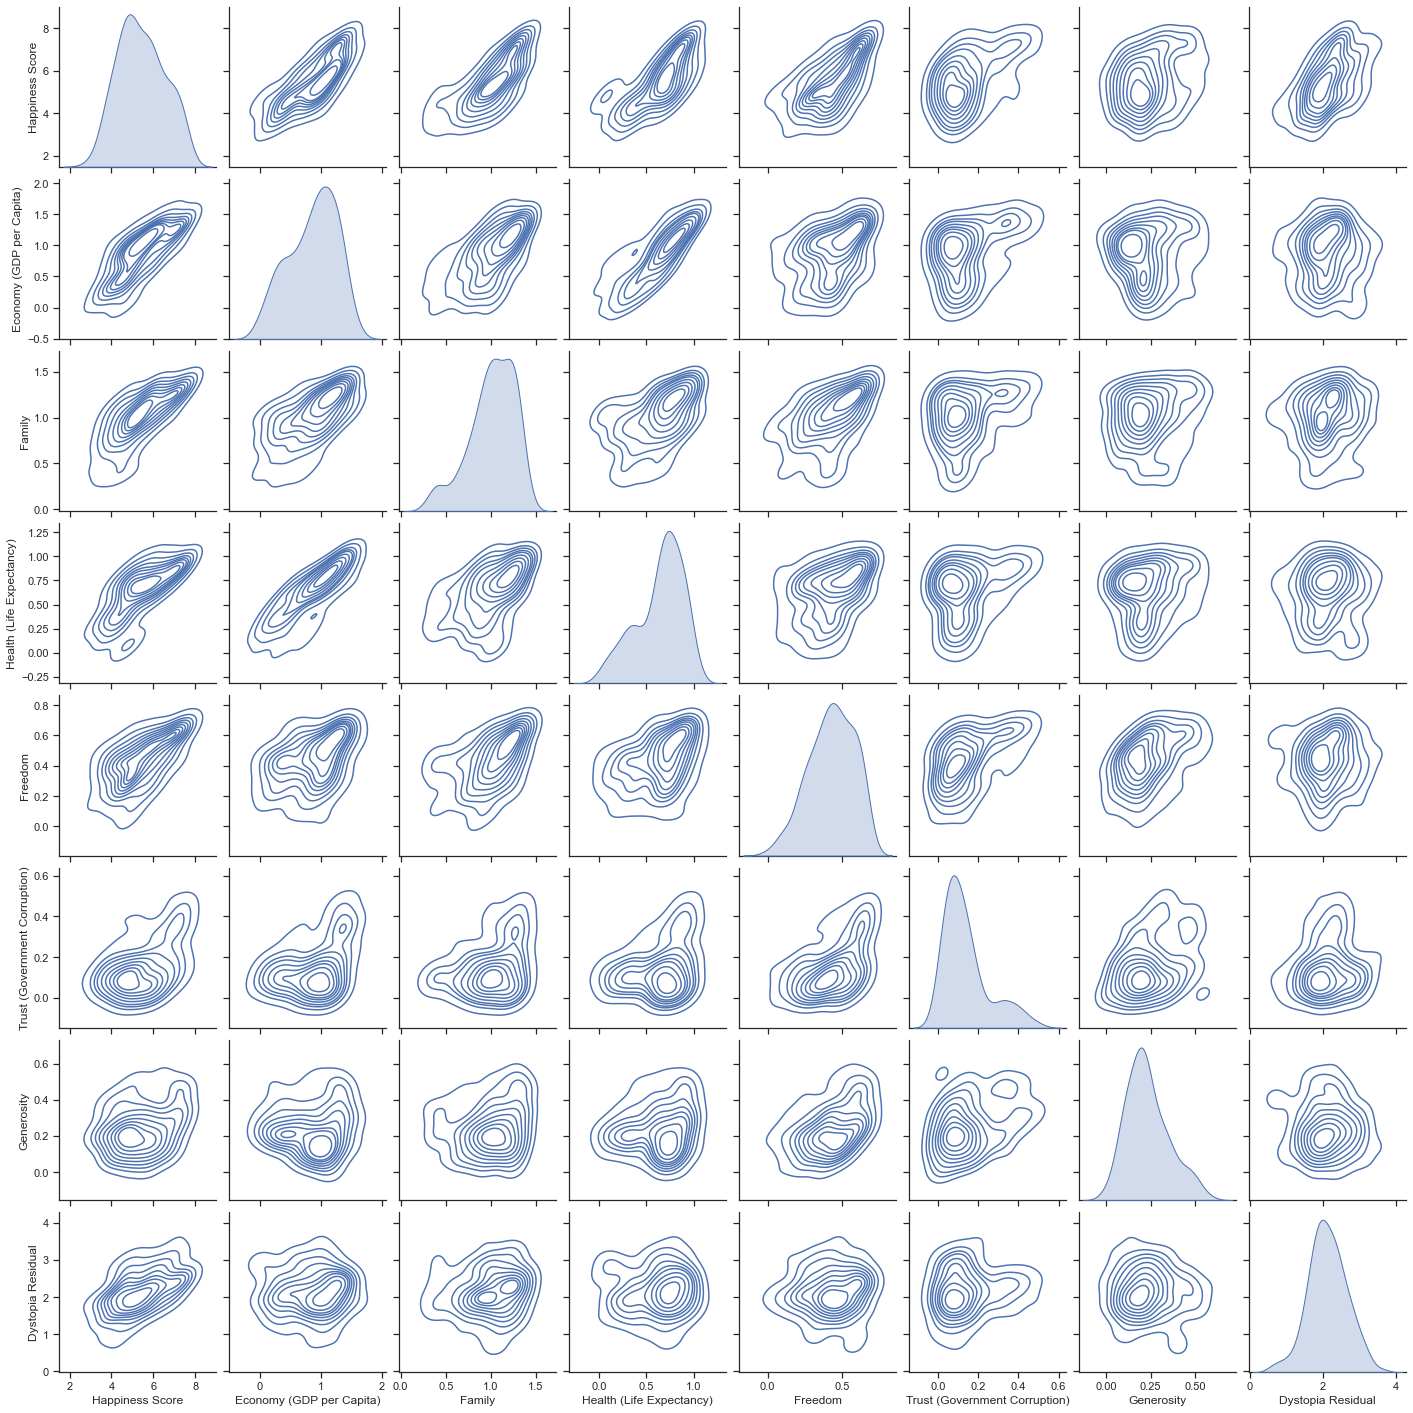

In [520]:
sns.pairplot(data_new,kind='kde')

Correlation heatmap and KDE pairplot is showing that target variable i.e. Happiness score have high correlation with Health(Life expectancy), Family, Economy(GDP per Capita) and moderate correlation with Freedom and Trust, Residual meaning they can contribute better than other variable to the target variable. Generosity has less correlation but we can not drop it as we have very less variables available. 
There is also a problem of Multi-coleaniarity among the variable like Economy and Health, but as i said due to less columns, i prefer not to drop any comlumn in this case.

In [521]:
y=data_new.iloc[:,0]
y.head() #selecting the first column as target (y)

0    7.587
1    7.561
2    7.527
3    7.522
4    7.427
Name: Happiness Score, dtype: float64

In [522]:
x=data_new.iloc[:,1:]
x #selecting the rest column as independent variables (x)

,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176
...,...,...,...,...,...,...,...
150,0.46534,0.77115,0.15185,0.46866,0.17922,0.20165,1.41723
151,0.25812,0.85188,0.27125,0.39493,0.12832,0.21747,1.46494
152,0.31982,0.30285,0.30335,0.23414,0.09719,0.36510,1.95210
154,0.28665,0.35386,0.31910,0.48450,0.08010,0.18260,1.63328


In [523]:
x.shape

(152, 7)

In [524]:
y.shape

(152,)

In [525]:
from sklearn.metrics import r2_score

maxscore=0
maxRS=0
for i in range(1,200):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3, random_state=i)
    mod = LinearRegression()
    mod.fit(x_train,y_train)
    pred = mod.predict(x_test)
    r2score = r2_score(y_test,pred)
    if r2score>maxscore:
        maxscore=r2score
        maxRS=i
print("Best r2 score is ", maxscore, 'on Random state ', maxRS)

Best r2 score is  0.9999999624707387 on Random state  185


In [526]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3, random_state=185)

In [527]:
x_test.shape

(46, 7)

In [528]:
y_test.shape

(46,)

In [529]:
x_train.shape

(106, 7)

In [530]:
y_train.shape

(106,)

In [531]:
model = LinearRegression()

In [532]:
model.fit(x_train,y_train)

LinearRegression()

In [533]:
model.coef_

array([1.00020571, 0.99986476, 0.99979656, 0.99966488, 0.99995986,
       1.00013085, 1.00000769])

In [534]:
model.intercept_

0.0001787539829463114

In [535]:
model.score(x_train,y_train)

0.9999999187666608

In [536]:
pred=model.predict(x_test)
print('Predicted Happiness score:',pred)
print("actual Happiness score",y_test)

Predicted Happiness score: [4.8742372  3.65596441 5.10167    4.89754121 6.93732427 3.34008583
 7.36362005 5.75440301 6.94621887 6.41118229 4.03307783 3.89655141
 6.13011699 4.35000893 3.84497182 5.19236954 4.36918919 4.83926595
 5.47384666 5.54814508 4.7147756  6.66967095 4.69399514 6.12274972
 3.58687369 4.7879179  7.56084568 5.19382374 6.5050444  5.82410169
 5.79057534 3.68088081 3.65511234 7.2839884  4.79958992 5.88895865
 6.75011317 6.48508468 4.25200243 7.19980335 4.29249839 3.99478373
 7.37810961 3.81924974 6.79778894 6.94022294]
actual Happiness score 99     4.874
149    3.656
87     5.102
96     4.898
18     6.937
154    3.340
7      7.364
62     5.754
16     6.946
34     6.411
136    4.033
142    3.896
41     6.130
126    4.350
143    3.845
82     5.192
125    4.369
102    4.839
71     5.474
69     5.548
107    4.715
26     6.670
108    4.694
42     6.123
151    3.587
104    4.788
1      7.561
80     5.194
30     6.505
57     5.824
59     5.791
146    3.681
150    3.655
9     

In [537]:
print('Mean sqaured error:',mean_squared_error(y_test,pred))

Mean sqaured error: 5.870564443000172e-08


In [538]:
model1=[LinearRegression(),KNeighborsRegressor(), DecisionTreeRegressor(), SVR()]

for m in model1:
    m.fit(x_train,y_train)
    m.score(x_train,y_train)
    m_pred=m.predict(x_test)
    r2sscore = r2_score(y_test,m_pred)
    MSE= mean_squared_error(y_test,m_pred)
    
    print(m)
    print(m.score(x_train,y_train))
    print('R2 score for :', m, 'is', r2score)
    print('Mean Squared Error for ',m ,"is:" ,MSE)
    print("\n")

LinearRegression()
0.9999999187666608
R2 score for : LinearRegression() is 0.9999999032805796
Mean Squared Error for  LinearRegression() is: 5.870564443000172e-08


KNeighborsRegressor()
0.963748437404912
R2 score for : KNeighborsRegressor() is 0.9999999032805796
Mean Squared Error for  KNeighborsRegressor() is: 0.06473712782608695


DecisionTreeRegressor()
1.0
R2 score for : DecisionTreeRegressor() is 0.9999999032805796
Mean Squared Error for  DecisionTreeRegressor() is: 0.4733331739130434


SVR()
0.9920112571718986
R2 score for : SVR() is 0.9999999032805796
Mean Squared Error for  SVR() is: 0.015013447288520864




In [539]:
from sklearn.model_selection import KFold
kfold=KFold(5)
score=cross_val_score(SVR(),x,y,cv=kfold)
print(score)
print(score.mean())
print(score.std())

[-0.79665146  0.83711158  0.84899041  0.58568621 -0.51701707]
0.19162393377417644
0.7046886404203888


In [540]:
from sklearn.model_selection import KFold
kfold=KFold(5)
score=cross_val_score(DecisionTreeRegressor(),x,y,cv=kfold)
print(score)
print(score.mean())
print(score.std())

[ -5.00487622  -9.50622865  -5.71835475 -11.04584028  -5.03641491]
-7.262342962491074
2.5212967415154797


In [541]:
from sklearn.model_selection import KFold
kfold=KFold(5)
score=cross_val_score(LinearRegression(),x,y,cv=kfold)
print(score)
print(score.mean())
print(score.std())

[0.99999947 0.99999824 0.99999841 0.99999437 0.99999922]
0.9999979441239665
1.8444668406602894e-06


In [542]:
from sklearn.model_selection import KFold
kfold=KFold(5)
score=cross_val_score(KNeighborsRegressor(),x,y,cv=kfold)
print(score)
print(score.mean())
print(score.std())

[-6.94684208 -1.38296067 -0.71887541 -3.93883367 -5.27437229]
-3.6523768253560123
2.337610249769009


As i see, LinearRegression Model has the least difference compared with the cross validation. Hence I will go ahead with the LinearRegression model for Hyperparameter Tuning.

In [543]:
from sklearn.model_selection import GridSearchCV

In [544]:
parameters = {'fit_intercept' : [True, False],
             'normalize' : [True, False],
             'copy_X': [True, False],
             'positive' : [True, False]}

In [545]:
GSV = GridSearchCV(LinearRegression(),parameters,cv=5)

In [546]:
GSV.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=LinearRegression(),
             param_grid={'copy_X': [True, False],
                         'fit_intercept': [True, False],
                         'normalize': [True, False],
                         'positive': [True, False]})

In [547]:
GSV.best_params_ #printing the best parameters fr the model building

{'copy_X': True, 'fit_intercept': False, 'normalize': True, 'positive': True}

In [548]:
Final_Model = LinearRegression(copy_X= True, fit_intercept= False, normalize=True,positive=True)
Final_Model.fit(x_train,y_train)
Final_Model.score(x_train,y_train)
model_pred=Final_Model.predict(x_test)
r2score = r2_score(y_test,model_pred)
MSE= mean_squared_error(y_test,model_pred)

In [549]:
print(Final_Model.score(x_train,y_train))
print('R2 score is :',r2score)
print('Mean Squared Error is ',MSE) 

0.9999999179982634
R2 score is : 0.9999999638486001
Mean Squared Error is  5.6550306549601906e-08


Finally the model is built with the best parameters and now I will save the model using joblib library.

In [552]:
import joblib
joblib.dump(Final_Model,'LR.obj')

['LR.obj']